In [49]:
import pandas as pd
import os
from pandas import DataFrame, Series

L = ['AVG_temp(°C)', 'day_precipitation(mm)', 'AVG_wind(m/s)', 'AVG_relative_hum(%)']

region_name = {'105' : '강릉', '294' : '거제', '156' : '광주', '143' : '대구', '133' : '대전', '258' : '보성', '159' : '부여', '108' : '서울', 
               '90' : '속초', '119' : '수원', '168' : '여수', '115' : '울릉도', '152' : '울산', '203' : '이천', '112' : '인천', '146' : '전주', 
               '184' : '제주', '131' : '청주', '162' : '통영', '99' : '파주', '138' : '포항', '212' : '홍천'}

region_name_L = [105, 294, 156, 143, 133, 258, 159, 108, 90, 119, 168, 115, 152, 203, 112, 146, 184, 131, 162, 99, 138, 212]

def clear_screen() :
    os.system('CLS')

def read_csv(file_name):
    ''' (str) --> dataFrame
    
    Return a new data made from the original csv file, which is a parameter named file_name.
    The new data has dropped unnecessary informations or informations that have lack of data.
    
    >>> read_mycsv('SURFACE_ASOS_DAY_ALL_E2.csv')
    dataframe of my_data_new
    
    '''
    print("\n\nreading original csv...")
    
    start_L = ['AVG_wind(m/s)', 'AVG_relative_hum(%)']
    
    df_wdata = pd.read_csv(file_name,low_memory=False)

    my_data = df_wdata[['region', 'date', 'AVG_temp(°C)', 'day_precipitation(mm)', 'AVG_wind(m/s)', 'AVG_relative_hum(%)']]

    my_data_dup = my_data.drop_duplicates(subset=['region','date'], keep='first')

    my_data_new = my_data_dup.dropna(subset = ['AVG_temp(°C)'])
    
    for i in start_L :
        my_data_new = my_data_new.dropna(subset = [i])
    my_data_new = my_data_new.fillna(0)
    print("done for the first-table")
    
    return my_data_new

def second_step_table(my_data_new):
    ''' (dataFrame) --> dataFrame
    
    Return a second data made from the first edited csv file, which is a parameter named my_data_new.
    The second data now has the averaged values of 10 years informations into 365 days for each region.
    
    >>> second_step_table(my_data_new)
    dataframe of second data
    
    '''
    print("\nprocessing with the second table...")
    final_data = my_data_new[:0]

    df_Gang = my_data_new[my_data_new['region'] == 105]
    period_idx = pd.period_range('2010-01-01','2010-12-31', freq='D')
    start_date = pd.to_datetime('2010-1-1')
    end_date = pd.to_datetime('2010-12-31')

    for i in region_name :
        new_row = {'region':i}
    
        for i in range (len(period_idx)) :
            pfinal_idx = period_idx[i]
            last_idx = str(pfinal_idx)
            last_idx = last_idx[5:]
            df_Gang_n = df_Gang[df_Gang['date'].str.contains(last_idx)]
            date_row = {'date':last_idx}
            new_row.update(date_row)
        
            for j in L : 
                value = round((df_Gang_n[j].mean()),3)
                before_row = {j:value}
                new_row.update(before_row)  
            
            final_data = final_data.append(new_row,ignore_index=True)
    print("done for the second-table\n")
    return final_data

def third_step_table(my_second_table):
    ''' (dataFrame) --> dataFrame
    
    Return a third data made from the first edited csv file, which is a parameter named final_data.
    The third data has been divided into 8 sections for the average temperature, and 2 for the other weather types.
    
    >>> third_step_table(my_second_table)
    dataframe of thrid_step_data
    
    '''
    
    print("processiong with the third table...")
    chance = my_second_table[:0]
    chance = chance[['region', 'date', 'AVG_temp(°C)','day_precipitation(mm)', 'AVG_wind(m/s)', 'AVG_relative_hum(%)']]

    period_idx1 = pd.period_range('2010-01-01','2010-12-31', freq='D') #2월 29일은 전부 제외되었다고 말하기

    jan_temp = round(my_second_table['AVG_temp(°C)'].median(),3)
    chance3 = my_second_table[my_second_table['AVG_temp(°C)'] > jan_temp]
    jan_temp3 = round(chance3['AVG_temp(°C)'].median(),3)  
    chance0 = my_second_table[my_second_table['AVG_temp(°C)'] < jan_temp]
    jan_temp0 = round(chance0['AVG_temp(°C)'].median(),3)  
    chance5 = my_second_table[my_second_table['AVG_temp(°C)'] > jan_temp3]
    jan_temp5 = round(chance5['AVG_temp(°C)'].median(),3)
    chance_1 = my_second_table[my_second_table['AVG_temp(°C)'] < jan_temp0]
    jan_temp_1 = round(chance_1['AVG_temp(°C)'].median(),3)
    chance1 = chance0[chance0['AVG_temp(°C)'] > jan_temp0]
    jan_temp1 = round(chance1['AVG_temp(°C)'].median(),3)
    chance2 = chance3[chance3['AVG_temp(°C)'] < jan_temp3]
    jan_temp2 = round(chance2['AVG_temp(°C)'].median(),3)
    jan_rain = round(my_second_table['day_precipitation(mm)'].median(),3)
    jan_wind = round(my_second_table['AVG_wind(m/s)'].median(),3)
    jan_hum = round(my_second_table['AVG_relative_hum(%)'].median(),3)

    compare = my_second_table['AVG_temp(°C)'] > jan_temp
    compare3 = my_second_table['AVG_temp(°C)'] > jan_temp3
    compare0 = my_second_table['AVG_temp(°C)'] > jan_temp0
    compare5 = my_second_table['AVG_temp(°C)'] > jan_temp5
    compare_1 = my_second_table['AVG_temp(°C)'] > jan_temp_1
    compare1 = my_second_table['AVG_temp(°C)'] > jan_temp1
    compare2 = my_second_table['AVG_temp(°C)'] > jan_temp2
    compare_rain = my_second_table['day_precipitation(mm)'] > jan_rain
    compare_wind = my_second_table['AVG_wind(m/s)'] > jan_wind
    compare_hum = my_second_table['AVG_relative_hum(%)'] > jan_hum

    for i in region_name :
        new_row1 = {'region':i}
        for j in range (len(period_idx1)) : 
            pfinal_idx1 = period_idx1[j]
            last_idx1 = str(pfinal_idx1)
            last_idx1 = last_idx1[5:]
            date_row1 = {'date':last_idx1}
            new_row1.update(date_row1)

            if compare[j] == True :
                if compare3[j] == True :
                    if compare5[j] == True :
                        month_row1 = {'AVG_temp(°C)':'8'}
                    else :
                        month_row1 = {'AVG_temp(°C)':'7'}
                else :
                    if compare2[j] == True :
                        month_row1 = {'AVG_temp(°C)':'6'}
                    else : 
                        month_row1 = {'AVG_temp(°C)':'5'}
            else :
                if compare0[j] == True :
                    if compare1[j] == True :
                        month_row1 = {'AVG_temp(°C)':'4'}
                    else :
                        month_row1 = {'AVG_temp(°C)':'3'}
                else :
                    if compare_1[j] == True :
                        month_row1 = {'AVG_temp(°C)':'2'}
                    else :
                        month_row1 = {'AVG_temp(°C)':'1'}
            new_row1.update(month_row1)
        
        
            if compare_rain[j] == True :
                month_row2 = {'day_precipitation(mm)':'2'}
                new_row1.update(month_row2)
            else :
                month_row2 = {'day_precipitation(mm)':'1'}
            new_row1.update(month_row2)
        
        
            if compare_wind[j] == True :
                month_row3 = {'AVG_wind(m/s)':'2'}
                new_row1.update(month_row3)
            else :
                month_row3 = {'AVG_wind(m/s)':'1'}
            new_row1.update(month_row3)
        
        
            if compare_hum[j] == True :
                month_row4 = {'AVG_relative_hum(%)':'2'}
                new_row1.update(month_row4)
            else :
                month_row4 = {'AVG_relative_hum(%)':'1'}
            new_row1.update(month_row4)
        
            chance = chance.append(new_row1,ignore_index=True)
            
    print("done for the third(final) table\n")
    return chance

def introduction():
    ''' () --> 
    
    Cleans the screen and return a string that contains the answer from the user about the preferred region out of the region_name list.
    
    >>> get_region() :
    Program : 'A date that has the perfect weather for your travel
    Explanation : This program is about recommending a specific date for your journey in Korea.
    It has the most famous 21 regions in Korea you can select from.
    This program has two functions.
    You can either choose to get a recommended region for a specific date you want or to get a recommended date when you choose a specific region.
    10 years of data of weather from the National weather service are collected.
    Based on this data, this program estimates the most preffered date for the weather you want
    
    '''
    clear_screen()
    
    Introduction_L = ["Explanation : This program is about recommending a specific date for your journey in Korea.",
                     "It has the most famous 21 regions in Korea you can select from.",
                     "This program has two functions.",
                     "You can either choose to get a recommended region for a specific date you want or to get a recommended date when you choose a specific region.",
                     "10 years of data of weather from the National weather service are collected.",
                     "Based on this data, this program estimates the most preffered date for the weather you want.\n"]
    
    print("Program : 'A date that has the perfect weather for your travel'\n")
    for i in Introduction_L :
        print(i,end=' ')


introduction()
    
original_file = 'SURFACE_ASOS_DAY_ALL_E2.csv'
my_first_table = read_csv(original_file)
my_second_table = second_step_table(my_first_table)
my_third_table = third_step_table(my_second_table)

Program : 'A date that has the perfect weather for your travel'

Explanation : This program is about recommending a specific date for your journey in Korea. It has the most famous 21 regions in Korea you can select from. This program has two functions. You can either choose to get a recommended region for a specific date you want or to get a recommended date when you choose a specific region. 10 years of data of weather from the National weather service are collected. Based on this data, this program estimates the most preffered date for the weather you want.
 

reading original csv...
done for the first-table

processing with the second table...
done for the second-table

processiong with the third table...
done for the third(final) table



In [78]:
def get_region():
    ''' () --> str
    
    Return a string that contains the answer from the user about the preferred region out of the region_name list.
    
    >>> get_region() :
    105 : 강릉 | 294 : 거제 | 156 : 광주 | 143 : 대구 | 133 : 대전 | 258 : 보성 | 159 : 부여 | 108 : 서울 | 90 : 속초 | 119 : 수원 | 168 : 여수 | 115 : 울릉도 | 152 : 울산 | 203 : 이천 | 112 : 인천 | 146 : 전주 | 184 : 제주 | 131 : 청주 | 162 : 통영 | 99 : 파주 | 138 : 포항 | 212 : 홍천 | 
    From the list, where do you want to visit? Please enter an assigned number beside the region. 105
    105
    
    '''
    
    for i,j in region_name.items() :
        print(i,':',j,end=' | ')
        
    print()
    answer = False
    while answer == False :
        print("From the list, where do you want to visit? Please enter an assigned number beside the region.")
        prefer_region = input()
        if prefer_region in region_name :
            answer = True
        else :
            print("It is not a correct region number in the list.")
    return prefer_region    
    
def get_input():
    ''' () --> list
    
    Return a list that contains the answers from the user about the preferred level of each type of weather.
    
    >>> get_input() :
    From 1 to 8, what level you want for average temperature(°C)?
    1
    From 1 to 2, what level you want for day precipitation(mm) ?
    1
    From 1 to 2, what level you want for average wind(m/s) ?
    1
    From 1 to 2, what level you want for average relative humidity(%) ?
    1
    [1,1,1,1]
    
    '''
    prefer_userL = []
    input_userL = ['day precipitation(mm)', 'average wind(m/s)', 'average relative humidity(%)']
    answer_number = ['1','2']
    answer_number_temp = ['1','2','3','4','5','6','7','8']
    
    jan_temp = round(my_second_table['AVG_temp(°C)'].median(),3)
    chance3 = my_second_table[my_second_table['AVG_temp(°C)'] > jan_temp]
    jan_temp3 = round(chance3['AVG_temp(°C)'].median(),3)  
    chance0 = my_second_table[my_second_table['AVG_temp(°C)'] < jan_temp]
    jan_temp0 = round(chance0['AVG_temp(°C)'].median(),3)  
    chance5 = my_second_table[my_second_table['AVG_temp(°C)'] > jan_temp3]
    jan_temp5 = round(chance5['AVG_temp(°C)'].median(),3)
    chance_1 = my_second_table[my_second_table['AVG_temp(°C)'] < jan_temp0]
    jan_temp_1 = round(chance_1['AVG_temp(°C)'].median(),3)
    chance1 = chance0[chance0['AVG_temp(°C)'] > jan_temp0]
    jan_temp1 = round(chance1['AVG_temp(°C)'].median(),3)
    chance2 = chance3[chance3['AVG_temp(°C)'] < jan_temp3]
    jan_temp2 = round(chance2['AVG_temp(°C)'].median(),3)
    
    answer = False
    while answer == False :
        print("\n\nFrom 1 to 8, what level you want for average temperature(°C)?\n")
        print("section 1 is until {}(°C), section 2 is between {}(°C) and {}(°C), section 3 is between {}(°C) and {}(°C),".format(jan_temp_1,jan_temp_1,jan_temp0,jan_temp0,jan_temp1))
        print("section 4 is between {}(°C) and {}(°C), section 5 is between {}(°C) and {}(°C), section 6 is between {}(°C) and {}(°C),".format(jan_temp1,jan_temp,jan_temp,jan_temp2,jan_temp2,jan_temp3))
        print("section 7 is between {}(°C) and {}(°C), and section 8 is from {}(°C) until max.".format(jan_temp3,jan_temp5,jan_temp5))
        prefer = input()
        if prefer in answer_number_temp :
            answer = True
        else :
            print("It is not an integer between 1 and 8.")
    prefer_userL.append(prefer)
            
    for i in input_userL:
        answer = False
        while answer == False :
            print("From 1 to 2, what level you want for", i,"?")
            prefer = input()
            if prefer in answer_number :
                answer = True
            else :
                print("It is not an integer between 1 and 2.")
        prefer_userL.append(prefer)
            
    return prefer_userL   

def get_user_table(my_third_table) :
    ''' (dataFrame) --> dataFrame
    
    Return user's choice based data made from the third edited csv file, which is a parameter named my_third_table.
    Out of my_third_table, only dates that have the right weather for each sections are in the returned table.
    
    >>> second_step_table(my_data_new)
    dataframe of final data
    
    '''
    
    user_region_table = my_third_table[my_third_table['region'].str.contains(region_user)]
    user_temp_table = user_region_table[user_region_table['AVG_temp(°C)'].str.contains(answer_user[0])]

    user_rain_table = user_temp_table[user_temp_table['day_precipitation(mm)'].str.contains(answer_user[1])]
    if len(user_rain_table) == 0 :
        user_rain_table = user_temp_table
    user_wind_table = user_rain_table[user_rain_table['AVG_wind(m/s)'].str.contains(answer_user[2])]
    if len(user_wind_table) == 0 :
        user_wind_table = user_rain_table
    user_hum_table = user_wind_table[user_wind_table['AVG_relative_hum(%)'].str.contains(answer_user[3])]
    if len(user_hum_table) == 0 :
        user_hum_table = user_wind_table
        
    final_user_actual_table = my_second_table[my_second_table.index.isin(user_hum_table.index)]
    return final_user_actual_table

def result_for_user(final_user_table):
    ''' (dataFrame) --> 
    
    Print the dates that satisfy user's choice, and also print the weather for those days.
    
    >>> result_for_user(final_user_table)
    dataframe of result_for_user
    
    '''
    user_base_L = ['date','AVG_temp(°C)', 'day_precipitation(mm)', 'AVG_wind(m/s)', 'AVG_relative_hum(%)']

    for j in final_user_table.index :
        user_choice_L = []
        for i in user_base_L :
            user_choice = final_user_table.loc[j,i]
            user_choice_L.append(user_choice)  
        print("the result date is {}, average temperature is {}(°C), day precipitation is {}(mm), average wind is {}(m/s), and average relative humidity is {}(%)\n".format(user_choice_L[0],user_choice_L[1],user_choice_L[2],user_choice_L[3],user_choice_L[4]))
        
region_user = get_region()
answer_user = get_input()
final_user_table = get_user_table(my_third_table)        
final_result = result_for_user(final_user_table)

105 : 강릉 | 294 : 거제 | 156 : 광주 | 143 : 대구 | 133 : 대전 | 258 : 보성 | 159 : 부여 | 108 : 서울 | 90 : 속초 | 119 : 수원 | 168 : 여수 | 115 : 울릉도 | 152 : 울산 | 203 : 이천 | 112 : 인천 | 146 : 전주 | 184 : 제주 | 131 : 청주 | 162 : 통영 | 99 : 파주 | 138 : 포항 | 212 : 홍천 | 
From the list, where do you want to visit? Please enter an assigned number beside the region.
105


From 1 to 8, what level you want for average temperature(°C)?

section 1 is until 1.48(°C), section 2 is between 1.48(°C) and 5.105(°C), section 3 is between 5.105(°C) and 9.95(°C),
section 4 is between 9.95(°C) and 15.01(°C), section 5 is between 15.01(°C) and 19.27(°C), section 6 is between 19.27(°C) and 21.36(°C),
section 7 is between 21.36(°C) and 24.7(°C), and section 8 is from 24.7(°C) until max.
2
From 1 to 2, what level you want for day precipitation(mm) ?
1
From 1 to 2, what level you want for average wind(m/s) ?
1
From 1 to 2, what level you want for average relative humidity(%) ?
1
the result date is 02-21, average temperature is 2.56(°C),

In [71]:
my_first_table.to_csv('my_first_table.csv', encoding='utf-8')
my_second_table.to_csv('my_second_table.csv', encoding='utf-8')
my_third_table.to_csv('my_third_table.csv', encoding='utf-8')

In [55]:
df_wdata = pd.read_csv('my_second_table.csv',low_memory=False)
df_105 = df_wdata[df_wdata['region'] == 105]
df_105

,Unnamed: 0,region,date,AVG_temp(°C),day_precipitation(mm),AVG_wind(m/s),AVG_relative_hum(%)
0,0,105,01-01,0.72,0.62,3.71,38.51
1,1,105,01-02,1.66,0.40,3.33,41.40
2,2,105,01-03,1.36,0.65,3.10,38.10
3,3,105,01-04,1.34,2.25,3.00,47.01
4,4,105,01-05,0.88,0.61,3.40,44.94
...,...,...,...,...,...,...,...
360,360,105,12-27,-0.28,2.30,3.11,36.99
361,361,105,12-28,0.66,0.75,2.93,41.39
362,362,105,12-29,1.62,0.65,3.04,44.31
363,363,105,12-30,2.40,0.00,3.42,43.79


/Users/heeyeon/opt/anaconda3/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:211: RuntimeWarning: Glyph 51648 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/Users/heeyeon/opt/anaconda3/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:211: RuntimeWarning: Glyph 50669 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/Users/heeyeon/opt/anaconda3/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:211: RuntimeWarning: Glyph 48324 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/Users/heeyeon/opt/anaconda3/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:211: RuntimeWarning: Glyph 49436 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/Users/heeyeon/opt/anaconda3/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:211: RuntimeWarning: Glyph 50872 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/Users/heeyeon/opt/anaconda3/lib/python3.7/site-package

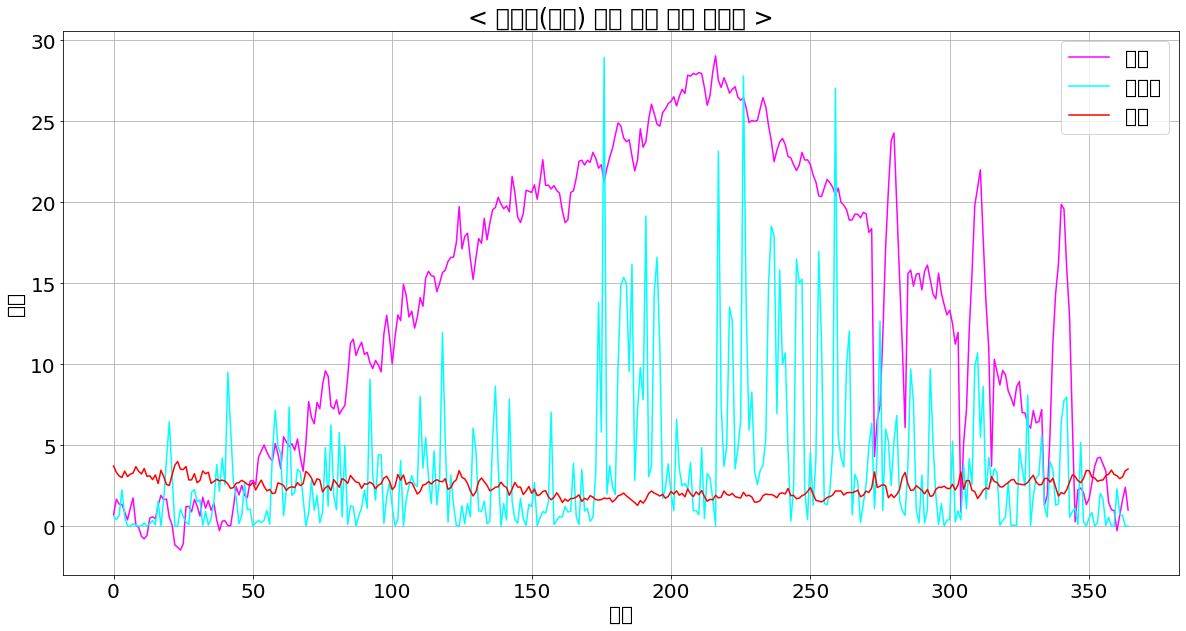

In [59]:
from matplotlib import pyplot

pyplot.rcParams["font.family"] = 'Batang'
pyplot.rcParams["font.size"] = 20
pyplot.rcParams["figure.figsize"] = (20, 10)

date = df_105['date']
AVG_temp = df_105['AVG_temp(°C)']
day_precipitation = df_105['day_precipitation(mm)']
AVG_wind = df_105['AVG_wind(m/s)']

pyplot.figure()
pyplot.plot(AVG_temp, label='온도', color='#ff00ff')
pyplot.plot(day_precipitation, label='강수량', color='#00ffff')
pyplot.plot(AVG_wind, label='풍속', color='#ff0000')

pyplot.legend()
pyplot.grid()
pyplot.title('< 지역별(강릉) 연간 평균 날씨 그래프 >')
pyplot.xlabel('날짜')
pyplot.ylabel('기온')
pyplot.autoscale(enable=True, axis='both')
pyplot.show()
pyplot.close()